In [1]:
import pandas as pd # type: ignore


# Model Training

In [2]:
df = pd.read_csv('gemstone.csv')
df.head() 

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [3]:
df = df.drop(labels=['carat'],axis=1)


In [4]:
X = df.drop(labels=['price'],axis=1)
y = df[['price']]

In [5]:
y

,price
0,499
1,984
2,6289
3,1082
4,779
...,...
26962,5408
26963,1114
26964,1656
26965,682


In [6]:
# segragating numerical and categorical variables
categorical_cols=X.select_dtypes(include=['object']).columns
numerical_cols=X.select_dtypes(include=['int64','float64']).columns

In [7]:
# define the custom ranking for each ordinal column
cut_categories = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_categories = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  
clarity_categories = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

In [8]:
from sklearn.impute import SimpleImputer  # type: ignore # Handling missing values
from sklearn.preprocessing import OrdinalEncoder # type: ignore # Handling feature Scaling
from sklearn.preprocessing import StandardScaler # type: ignore # Ordinal Encoding

# pipelines
from sklearn.pipeline import Pipeline # type: ignore
from sklearn.compose import ColumnTransformer # type: ignore

In [9]:
#Numerical pipeline
num_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy= 'median')),
        ('scaler',StandardScaler())

    ]
)

#Categorical pipeline
cat_pipeline=Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('ordinalencoder',OrdinalEncoder(categories=[cut_categories,color_categories,clarity_categories])),
        ('scaler',StandardScaler())
    ]
)

preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split # type: ignore
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [11]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [12]:
X_train.head()

,num_pipeline__Unnamed: 0,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,-1.144668,0.318936,-0.651005,0.704838,0.692859,0.723432,0.983583,-0.226283,0.576148
1,-1.046522,-0.397691,1.589878,-0.533052,-0.486169,-0.533329,-0.812066,0.945547,-0.639724
2,1.203004,-0.254365,-1.099182,-0.409263,-0.376688,-0.410385,0.983583,-0.812198,-1.247659
3,-1.390742,0.247274,-1.099182,-1.178523,-1.134635,-1.107067,0.983583,-0.812198,0.576148
4,0.665320,0.963901,-0.651005,0.413049,0.330729,0.477544,-0.812066,-0.812198,-0.031788


In [22]:
X_test.head()

,num_pipeline__Unnamed: 0,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.104096,0.175611,1.589878,-0.904419,-0.898829,-0.861180,0.085758,0.945547,-0.639724
1,0.613995,-0.970992,0.693525,0.536838,0.532848,0.409242,0.085758,0.945547,-1.247659
2,0.105254,-0.397691,-0.202829,0.819784,0.734967,0.709771,0.085758,-1.984028,-0.031788
3,0.325344,-1.329306,2.934408,0.978942,0.886556,0.737092,-1.709890,0.945547,-0.639724
4,-0.089496,-0.254365,0.693525,-1.293470,-1.210430,-1.243672,-0.812066,-0.226283,2.399955


In [13]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet # type: ignore
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error # type: ignore

In [14]:
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
regression=LinearRegression()
regression.fit(X_test,y_test)

LinearRegression()

In [16]:
regression.coef_

array([[4.52011430e-01, 1.59667565e+02, 6.73327941e+01, 3.66667056e+02,
        3.33320248e+03, 5.86112901e+02, 1.98214523e+02, 4.31282766e+02,
        8.89176850e+02]])

In [17]:
regression.intercept_

array([3964.70605694])

In [18]:
import numpy as np # type: ignore
def evaluate_model(X_test, X_pred):
    mae = mean_absolute_error(X_test, X_pred)
    rmse = np.sqrt(mean_squared_error(X_test, X_pred))
    r2_square = r2_score(X_test, X_pred)
    return mae, rmse, r2_square

In [24]:

y_pred = regression.predict(X_test)

def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2_square = r2_score(y_test, y_pred)
    return mae, rmse, r2_square

result = evaluate_model(y_test, y_pred) 
print(f"evaluate_model returned: {result}, Length: {len(result)}")

evaluate_model returned: (1247.5125741180307, 1630.5352743910232, 0.8364902771133238), Length: 3


In [21]:
# Train multiple models

models={
    "LinearRegression": LinearRegression(),
    "Ridge Regression": Ridge(), 
    "Lasso Regression": Lasso(),   
    "Elastic Net": ElasticNet()  
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    
    model.fit(X_train,y_train)

    #make predictions
    y_pred=model.predict(X_test)

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)
    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Training performance")
    print("RMSE:",rmse)
    print("MAE",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)

    print("="*35)
    print("\n")
   

LinearRegression
Model Training performance
RMSE: 1638.5152912605329
MAE 1239.625717765959
R2 score 83.4885891965278


Ridge Regression
Model Training performance
RMSE: 1638.50750963664
MAE 1239.5787113829217
R2 score 83.4887460278792


Lasso Regression
Model Training performance
RMSE: 1638.5060640909144
MAE 1239.3676355474583
R2 score 83.48877516141926


Elastic Net
Model Training performance
RMSE: 1845.11185918209
MAE 1217.643076560961
R2 score 79.0623186627393




In [ ]:
model_list

['LinearRegression', 'Ridge Regression', 'Lasso Regression', 'Elastic Net']

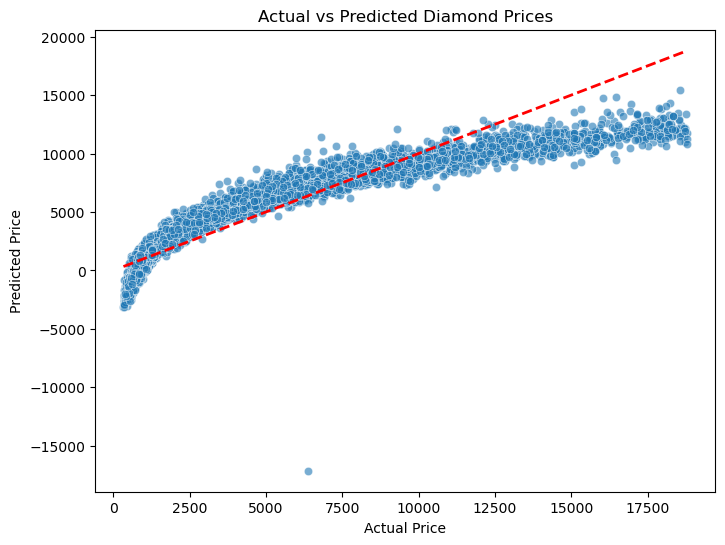

In [ ]:
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
import seaborn as sns # type: ignore

# Ensure y_test and y_pred are 1D arrays
y_test = np.ravel(y_test)  # Converts to 1D
y_pred = np.ravel(y_pred)  # Converts to 1D

# Scatter plot: Actual vs Predicted Prices
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)

# Perfect prediction line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)

# Labels and Title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Diamond Prices")
plt.show()
